In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

1. CARGA DE LOS DOS ARCHIVOS

In [7]:
#    Ajustá los nombres si en tu carpeta se llaman distinto
# -------------------------------------------------------------
prov = pd.read_csv('Internet Accesos Velocidad Provincias.csv',
                   thousands='.', decimal=',')
loc = pd.read_csv('Internet Accesos Velocidad Localidades.csv',
                  thousands='.', decimal=',')

print("=== Provincias: vista inicial ===")
print(prov.head())
print(prov.info())

print("\n=== Localidades: vista inicial ===")
print(loc.head())
print(loc.info())


=== Provincias: vista inicial ===
    Año  Trimestre     Provincia  Velocidad  Accesos
0  2025          1  Buenos Aires        0.0    66998
1  2025          1  Buenos Aires        1.0    20172
2  2025          1  Buenos Aires        2.0    18797
3  2025          1  Buenos Aires        3.0    44330
4  2025          1  Buenos Aires        4.0    12110
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21767 entries, 0 to 21766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        21767 non-null  int64  
 1   Trimestre  21767 non-null  int64  
 2   Provincia  21767 non-null  object 
 3   Velocidad  21767 non-null  float64
 4   Accesos    21767 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 850.4+ KB
None

=== Localidades: vista inicial ===
   LinkIndec     Provincia     Partido   Localidad  Velocidad Accesos
0    6588100  BUENOS AIRES  9 de Julio  9 de Julio        1.0       6
1    6588100  B

2. REVISIÓN BÁSICA DE CALIDAD (NULOS Y DUPLICADOS)

In [8]:
def resumen_calidad(df, nombre):
    print(f"\n===== Calidad de datos: {nombre} =====")
    print("Nulos por columna:")
    print(df.isna().sum())
    print("Filas duplicadas:", df.duplicated().sum())

resumen_calidad(prov, "Velocidad Provincias")
resumen_calidad(loc, "Velocidad Localidades")


===== Calidad de datos: Velocidad Provincias =====
Nulos por columna:
Año          0
Trimestre    0
Provincia    0
Velocidad    0
Accesos      0
dtype: int64
Filas duplicadas: 0

===== Calidad de datos: Velocidad Localidades =====
Nulos por columna:
LinkIndec    0
Provincia    0
Partido      0
Localidad    0
Velocidad    0
Accesos      0
dtype: int64
Filas duplicadas: 0


3. ASEGURAR QUE 'Accesos' ES NUMÉRICA EN AMBOS

In [17]:
# Normalizamos ACCESOS en ambos dataframes
for df in [prov, loc]:
    df["Accesos"] = pd.to_numeric(df["Accesos"], errors="coerce")  # asegura float/num
    df["Accesos"] = df["Accesos"].fillna(0)  # por si había NaN
    df["Accesos"] = df["Accesos"].astype("int64")  # unificación final
print(prov.info())
print(loc.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21767 entries, 0 to 21766
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        21767 non-null  int64  
 1   Trimestre  21767 non-null  int64  
 2   Provincia  21767 non-null  object 
 3   Velocidad  21767 non-null  float64
 4   Accesos    21767 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 850.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24297 entries, 0 to 24296
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LinkIndec  24297 non-null  int64  
 1   Provincia  24297 non-null  object 
 2   Partido    24297 non-null  object 
 3   Localidad  24297 non-null  object 
 4   Velocidad  24297 non-null  float64
 5   Accesos    24297 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB
None


4. CREAR 'Periodo' SI EXISTEN 'Año' Y 'Trimestre'

In [19]:
for df in [prov, loc]:
    if {'Año', 'Trimestre'}.issubset(df.columns):
        df['Periodo'] = df['Año'].astype(str) + '-T' + df['Trimestre'].astype(str)
print(prov.head())
print(loc.head())

    Año  Trimestre     Provincia  Velocidad  Accesos  Periodo
0  2025          1  Buenos Aires        0.0    66998  2025-T1
1  2025          1  Buenos Aires        1.0    20172  2025-T1
2  2025          1  Buenos Aires        2.0    18797  2025-T1
3  2025          1  Buenos Aires        3.0    44330  2025-T1
4  2025          1  Buenos Aires        4.0    12110  2025-T1
   LinkIndec     Provincia     Partido   Localidad  Velocidad  Accesos
0    6588100  BUENOS AIRES  9 de Julio  9 de Julio        1.0        6
1    6588100  BUENOS AIRES  9 de Julio  9 de Julio        3.0      217
2    6588100  BUENOS AIRES  9 de Julio  9 de Julio        5.0      169
3    6588100  BUENOS AIRES  9 de Julio  9 de Julio        6.0       32
4    6588100  BUENOS AIRES  9 de Julio  9 de Julio        7.0      235


5. ESTADÍSTICAS DESCRIPTIVAS DE 'Accesos'

In [26]:
print("\n=== Estadísticos de AccesosVelocidad por archivo ===")
for nombre, df in [("Provincias", prov), ("Localidades", loc)]:
    if 'Velocidad' in df.columns:
        print(f"\n>>> {nombre}")
        print(df['Velocidad'].describe())


=== Estadísticos de AccesosVelocidad por archivo ===

>>> Provincias
count    21767.000000
mean       105.788023
std        384.591985
min          0.000000
25%          4.000000
50%         15.000000
75%         50.100000
max      10000.000000
Name: Velocidad, dtype: float64

>>> Localidades
count    24297.000000
mean       139.628397
std        260.449706
min          0.000000
25%          5.000000
50%         20.000000
75%        226.500000
max       8192.000000
Name: Velocidad, dtype: float64


6. OUTLIERS EN 'Accesos' (IQR) PARA AMBOS ARCHIVOS

In [36]:
def outliers_velocidad(df):
    q1 = df["Velocidad"].quantile(0.25)
    q3 = df["Velocidad"].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 15 * iqr
    
    outliers = df[df["Velocidad"] > limite_superior].sort_values("Velocidad", ascending=False)
    return outliers, limite_superior


In [37]:
for nombre, df in [("PROVINCIAS", prov), ("LOCALIDADES", loc)]:
    print(f"\n==================== OUTLIERS DE VELOCIDAD ({nombre}) ====================\n")
    
    out, lim = outliers_velocidad(df)
    
    print(f"Límite superior IQR = {lim:.2f}")
    print(f"Cantidad de outliers encontrados = {len(out)}\n")
    
    print("Listado de outliers superiores (ordenados de mayor a menor velocidad):\n")
    display(out[["Velocidad", "Accesos"]].head(10))   # mostrás los primeros 10 (podés cambiarlo)



==================== OUTLIERS DE VELOCIDAD (PROVINCIAS) ====================

Límite superior IQR = 741.60
Cantidad de outliers encontrados = 700

Listado de outliers superiores (ordenados de mayor a menor velocidad):



,Velocidad,Accesos
15028,10000.0,2
12776,10000.0,2
13545,10000.0,2
14290,10000.0,2
955,8192.0,1
12431,8000.0,8
13780,8000.0,18
13204,8000.0,8
12138,8000.0,7
12914,8000.0,7



==================== OUTLIERS DE VELOCIDAD (LOCALIDADES) ====================

Límite superior IQR = 3549.00
Cantidad de outliers encontrados = 14

Listado de outliers superiores (ordenados de mayor a menor velocidad):



,Velocidad,Accesos
23498,8192.0,1
15118,6144.0,1
18780,4098.0,1
13397,4096.0,1
9960,4096.0,1
13281,4096.0,1
14585,4096.0,1
13474,4096.0,1
13444,4096.0,1
19180,4096.0,1


GRÁFICO: ACCESOS POR VELOCIDAD, SEPARADO POR NIVEL

In [39]:
bins = [0, 10, 30, 50, 100, 300, 1000, float('inf')]
labels = ["0–10 Mbps", "10–30 Mbps", "30–50 Mbps",
          "50–100 Mbps", "100–300 Mbps", "300–1000 Mbps", ">1000 Mbps"]

# Para provincias
prov["Rango_Velocidad"] = pd.cut(prov["Velocidad"], bins=bins, labels=labels, right=False)

# Para localidades
loc["Rango_Velocidad"] = pd.cut(loc["Velocidad"], bins=bins, labels=labels, right=False)


In [40]:
acc_prov_rangos = prov.groupby("Rango_Velocidad")["Accesos"].sum()
acc_loc_rangos = loc.groupby("Rango_Velocidad")["Accesos"].sum()

print("\n=== Accesos por rango de velocidad (PROVINCIAS) ===")
print(acc_prov_rangos)

print("\n=== Accesos por rango de velocidad (LOCALIDADES) ===")
print(acc_loc_rangos)



=== Accesos por rango de velocidad (PROVINCIAS) ===
Rango_Velocidad
0–10 Mbps        77617448
10–30 Mbps       67418690
30–50 Mbps       16605008
50–100 Mbps      54939078
100–300 Mbps     49577374
300–1000 Mbps    33897850
>1000 Mbps        2362789
Name: Accesos, dtype: int64

=== Accesos por rango de velocidad (LOCALIDADES) ===
Rango_Velocidad
0–10 Mbps        564367
10–30 Mbps       443081
30–50 Mbps        72958
50–100 Mbps      182463
100–300 Mbps     266289
300–1000 Mbps    386298
>1000 Mbps        80710
Name: Accesos, dtype: int64


C:\Users\el6no\AppData\Local\Temp\ipykernel_10804\428422933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_prov_rangos = prov.groupby("Rango_Velocidad")["Accesos"].sum()
C:\Users\el6no\AppData\Local\Temp\ipykernel_10804\428422933.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_loc_rangos = loc.groupby("Rango_Velocidad")["Accesos"].sum()


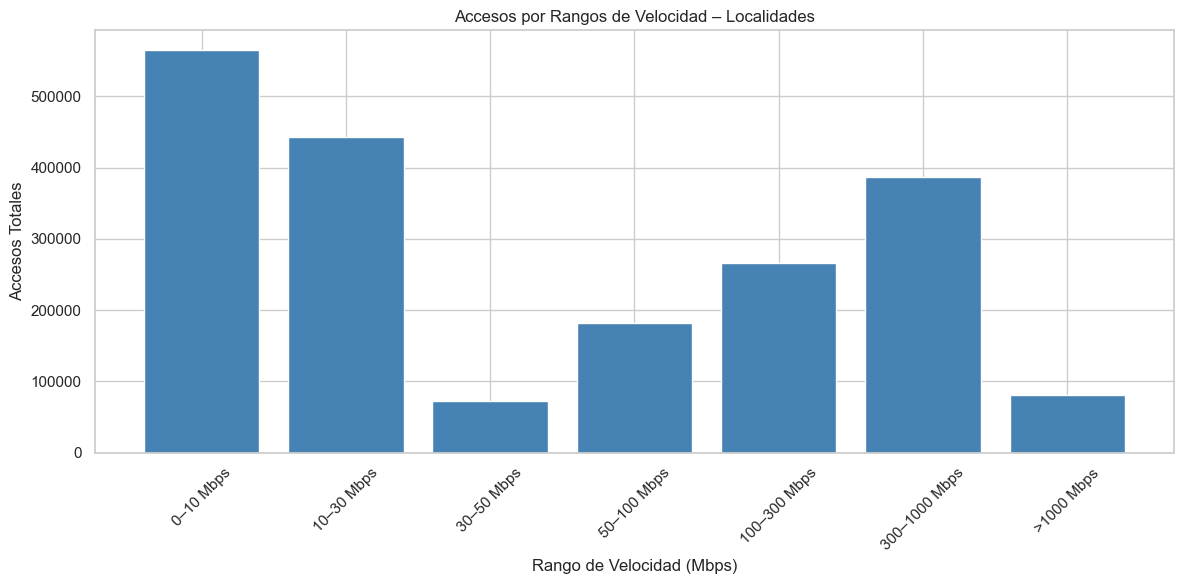

In [41]:
plt.figure(figsize=(12,6))
plt.bar(acc_loc_rangos.index.astype(str), acc_loc_rangos.values, color="steelblue")
plt.title("Accesos por Rangos de Velocidad – Localidades")
plt.xlabel("Rango de Velocidad (Mbps)")
plt.ylabel("Accesos Totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


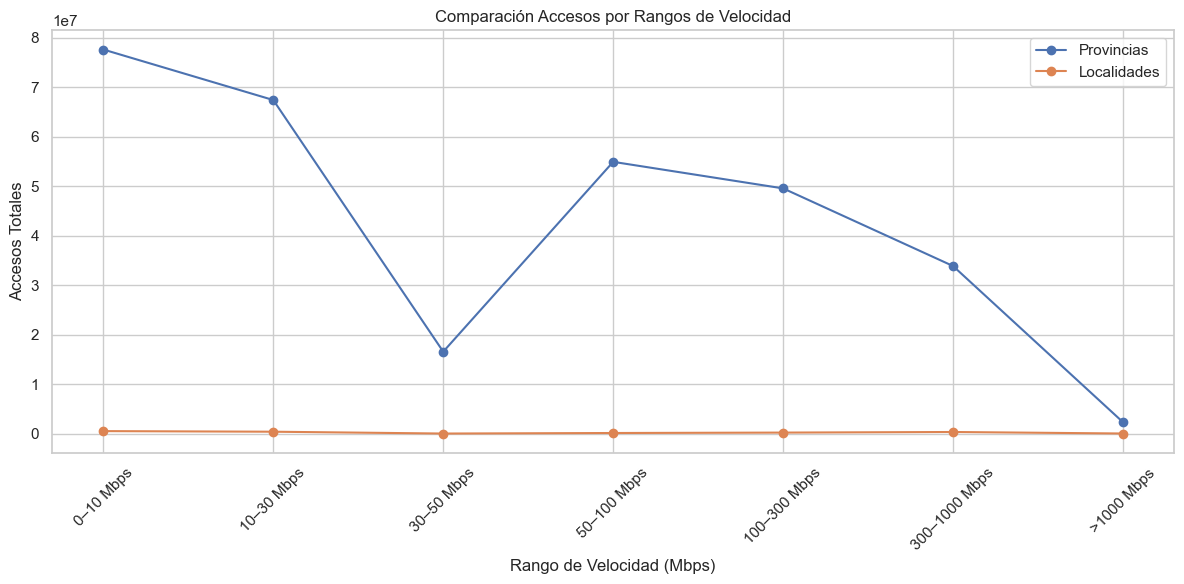

In [42]:
plt.figure(figsize=(12,6))

plt.plot(acc_prov_rangos.index.astype(str), acc_prov_rangos.values,
         marker='o', label="Provincias")

plt.plot(acc_loc_rangos.index.astype(str), acc_loc_rangos.values,
         marker='o', label="Localidades")

plt.title("Comparación Accesos por Rangos de Velocidad")
plt.xlabel("Rango de Velocidad (Mbps)")
plt.ylabel("Accesos Totales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


TOP 10 LOCALIDADES POR ACCESOS (INCLUYE VELOCIDAD)

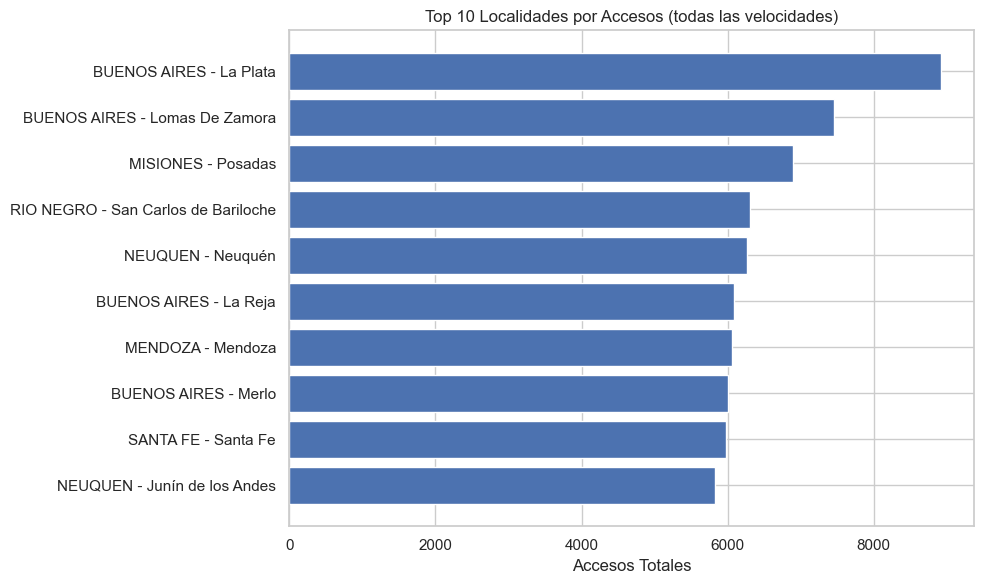

In [43]:
if {'Provincia', 'Localidad', 'Accesos'}.issubset(loc.columns):
    top10_loc = (
        loc.groupby(['Provincia', 'Localidad'], as_index=False)['Accesos']
           .sum()
           .sort_values('Accesos', ascending=False)
           .head(10)
    )

    top10_loc['Etiqueta'] = top10_loc['Provincia'] + ' - ' + top10_loc['Localidad']

    plt.figure(figsize=(10,6))
    plt.barh(top10_loc['Etiqueta'], top10_loc['Accesos'])
    plt.gca().invert_yaxis()
    plt.xlabel('Accesos Totales')
    plt.title('Top 10 Localidades por Accesos (todas las velocidades)')
    plt.tight_layout()
    plt.show()


Guardar datasets limpios

In [44]:
def convertir_decimales_a_coma(df):
    df_export = df.copy()
    for col in df_export.columns:
        if df_export[col].dtype in ["float64", "float32"]:
            df_export[col] = df_export[col].apply(lambda x: str(x).replace('.', ','))
    return df_export


In [45]:
prov_clean = convertir_decimales_a_coma(prov)
loc_clean  = convertir_decimales_a_coma(loc)


In [46]:
prov_clean.to_csv(
    "Internet_Accesos_Velocidad_Provincias_CLEAN.csv",
    sep=';',
    index=False,
    encoding='utf-8'
)

loc_clean.to_csv(
    "Internet_Accesos_Velocidad_Localidades_CLEAN.csv",
    sep=';',
    index=False,
    encoding='utf-8'
)

print("Archivos guardados correctamente en formato Excel-friendly.")


Archivos guardados correctamente en formato Excel-friendly.
